In [1]:
"""Задание 1. Базовое изучение
Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения 
(среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, 
кратко описать результаты
"""
import pandas as pd

In [2]:
missing_values = ["?"]
horse_data = pd.read_csv('horse_data.csv',header=None,na_values = missing_values)

In [3]:
import os
from os import listdir
os.listdir() 


['.ipynb_checkpoints',
 'Homework15_BasicStat.ipynb',
 'horse_data.csv',
 'horse_data.names',
 'stat_basics.ipynb']

In [4]:
with open("horse_data.names") as f:
    print(f.read())

1. TItle: Horse Colic database

2. Source Information
   -- Creators: Mary McLeish & Matt Cecile
	  	Department of Computer Science
		University of Guelph
		Guelph, Ontario, Canada N1G 2W1
		mdmcleish@water.waterloo.edu
   -- Donor:    Will Taylor (taylor@pluto.arc.nasa.gov)
   -- Date:     8/6/89

3. Past Usage:
   -- Unknown

4. Relevant Information:

   -- 2 data files
      -- horse-colic.data: 300 training instances
      -- horse-colic.test: 68 test instances
   -- Possible class attributes: 24 (whether lesion is surgical)
     -- others include: 23, 25, 26, and 27
   -- Many Data types: (continuous, discrete, and nominal)

5. Number of Instances: 368 (300 for training, 68 for testing)

6. Number of attributes: 28

7. Attribute Information:

  1:  surgery?
          1 = Yes, it had surgery
          2 = It was treated without surgery

  2:  Age
          1 = Adult horse
          2 = Young (< 6 months)

  3:  Hospital Number
          - numeric id
          - the case number assi

In [5]:
#pain_ctg: should NOT be treated as a ordered or discrete variable

#переименовываем колонки

horse_data.columns = ['surgery_flg', 'age_flg', 'horse_id', 'rect_temp', 'pulse', 
                      'respir_rate', 'extr_temp_ctg','pulse_periph_ctg', 'colour_muc_ctg', 'time_capil_refil_flg',
                      'pain_ctg', 'perist_ctg' , 'distension_ctg', 'gas_ctg', 'reflux_ctg', 
                      'reflux_ph', 'fecal_ctg', 'abdomen_ctg', 'red_cells_volume', 'protein',
                      'abd_fluid_ctg', 'abd_protein', 'outcome', 'lesion_flg', 'les_type1',
                      'les_type2', 'les_type3', 'path_data_flg']
                      
                      

In [6]:
horse_data.head()

,surgery_flg,age_flg,horse_id,rect_temp,pulse,respir_rate,extr_temp_ctg,pulse_periph_ctg,colour_muc_ctg,time_capil_refil_flg,...,red_cells_volume,protein,abd_fluid_ctg,abd_protein,outcome,lesion_flg,les_type1,les_type2,les_type3,path_data_flg
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [7]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   surgery_flg           299 non-null    float64
 1   age_flg               300 non-null    int64  
 2   horse_id              300 non-null    int64  
 3   rect_temp             240 non-null    float64
 4   pulse                 276 non-null    float64
 5   respir_rate           242 non-null    float64
 6   extr_temp_ctg         244 non-null    float64
 7   pulse_periph_ctg      231 non-null    float64
 8   colour_muc_ctg        253 non-null    float64
 9   time_capil_refil_flg  268 non-null    float64
 10  pain_ctg              245 non-null    float64
 11  perist_ctg            256 non-null    float64
 12  distension_ctg        244 non-null    float64
 13  gas_ctg               196 non-null    float64
 14  reflux_ctg            194 non-null    float64
 15  reflux_ph             5

In [8]:
#4 числовые переменные для анализа
#reflux_ph: scale is from 0 to 14 with 7 being neutral. normal values 3 - 4
#red_cells_volume:the # of red cells by volume in the blood normal range is 30 to 50.
#protein: normal values lie in the 6-7.5 (gms/dL) range
#pulse: the heart rate in beats per minute 30 -40 is normal for adults. athletic horses may have 20-25

#4 категориальные переменные для анализа
#distension_ctg: An IMPORTANT parameter. possible values 1 = none 2 = slight 3 = moderate  4 = severe
#abd_fluid_ctg: possible values:1 = clear 2 = cloudy   3 = serosanguinous - normal fluid is clear 
#outcome: result 1 = lived  2 = died   3 = was euthanized
#age_flg: 1 = Adult horse  2 = Young (< 6 months)

horse_data_small = horse_data[['reflux_ph', 'red_cells_volume', 'protein', 'pulse', 
                              'distension_ctg', 'abd_fluid_ctg', 'outcome', 'age_flg']]

In [9]:
horse_data_small.head()

,reflux_ph,red_cells_volume,protein,pulse,distension_ctg,abd_fluid_ctg,outcome,age_flg
0,NaN,45.0,8.4,66.0,4.0,NaN,2.0,1
1,NaN,50.0,85.0,88.0,2.0,2.0,3.0,1
2,NaN,33.0,6.7,40.0,1.0,NaN,1.0,1
3,5.0,48.0,7.2,164.0,4.0,3.0,2.0,9
4,NaN,74.0,7.4,104.0,NaN,NaN,2.0,1


In [10]:
horse_data_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reflux_ph         53 non-null     float64
 1   red_cells_volume  271 non-null    float64
 2   protein           267 non-null    float64
 3   pulse             276 non-null    float64
 4   distension_ctg    244 non-null    float64
 5   abd_fluid_ctg     135 non-null    float64
 6   outcome           299 non-null    float64
 7   age_flg           300 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [11]:
#Базовые метрики
"""
reflux_ph. Среднее=4.707547. Нормальные значение 3-4, среднее сдвинуто в сторону более высоких значений. 
Разброс от 1 до 7.5 , это укладывается в диапазон шкалы от 0 до 14. Экстремальных выбросов нет

red_cells_volume. Среднее=46.295203. Нормальные значения 30-50. Среднее укладывается в диапазон нормальных значений
Разброс от 23 до 75. Экстремальных выбросов нет

protein. Среднее=24.456929. Нормальные значения 6-7.5 . Разброс от 3,3 до 89.  Очень большой разброс. Среднее сильно выше 
нормальных показателей. Возможно наличие выбросов, либо причина в том что это показатель болезни

pulse. Среднее=71.913043. Нормальные значения 30-40. Разброс от 30 до 184. Среднее в 2 раза выше 
нормальных показателей. Нет значений ниже 30, которые характеризуют спортивную лошадь

distension_ctg. Среднее=2.266393. Разброс от 1 до 4, шкала 1,2,3,4. Экстремальных выбросов вне шкалы нет

abd_fluid_ctg. Среднее=2.037037. Разброс от 1 до 3, шкала 1,2,3. Экстремальных выбросов вне шкалы нет

outcome. Среднее=1.551839. Разброс от 1 до 3, шкала 1,2,3. Экстремальных выбросов вне шкалы нет

age_flg. Среднее=1.640000. Разброс от 1 до 9, шкала 1,2. Есть выбросы вне шкалы (9 = недопусимое значение)
"""

horse_data_small.describe()

,reflux_ph,red_cells_volume,protein,pulse,distension_ctg,abd_fluid_ctg,outcome,age_flg
count,53.000000,271.000000,267.000000,276.000000,244.000000,135.000000,299.000000,300.000000
mean,4.707547,46.295203,24.456929,71.913043,2.266393,2.037037,1.551839,1.640000
std,1.982311,10.419335,27.475009,28.630557,1.065131,0.804905,0.737187,2.173972
min,1.000000,23.000000,3.300000,30.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,38.000000,6.500000,48.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,45.000000,7.500000,64.000000,2.000000,2.000000,1.000000,1.000000
75%,6.500000,52.000000,57.000000,88.000000,3.000000,3.000000,2.000000,1.000000
max,7.500000,75.000000,89.000000,184.000000,4.000000,3.000000,3.000000,9.000000


In [12]:
"""Задание 2. Работа с выбросами
В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. 
Принять и обосновать решение о дальнейшей работе с ними.
"""

'Задание 2. Работа с выбросами\nВ выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. \nПринять и обосновать решение о дальнейшей работе с ними.\n'

# Шаг 1: проверка категориальных переменных

In [21]:
#Допустимые значения: 1, 2
#Есть выброс - значение 9. Возможно вместо значения 2 ставилось 9. Либо значения полностью некорректные.
horse_data_small['age_flg'].value_counts()

1    276
9     24
Name: age_flg, dtype: int64

In [22]:
#Допустимые значения: 1, 2, 3
#Выбросов нет
horse_data_small['outcome'].value_counts()

1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64

In [23]:
#доля выживших 60%
horse_data_small['outcome'].value_counts(normalize=True)

1.0    0.595318
2.0    0.257525
3.0    0.147157
Name: outcome, dtype: float64

In [24]:
#Допустимые значения: 1, 2, 3
#Выбросов нет
horse_data_small['abd_fluid_ctg'].value_counts()

2.0    48
3.0    46
1.0    41
Name: abd_fluid_ctg, dtype: int64

In [25]:
#Допустимые значения: 1, 2, 3, 4
#Выбросов нет
horse_data_small['distension_ctg'].value_counts()

1.0    76
2.0    65
3.0    65
4.0    38
Name: distension_ctg, dtype: int64

# Шаг 2: проверка числовых переменных

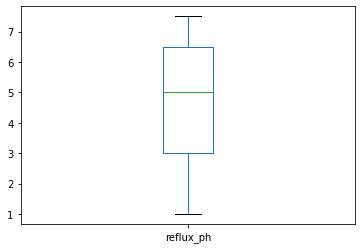

In [26]:
import matplotlib.pyplot as plt

#переменная reflux_ph- нет выбросов
horse_data_small['reflux_ph'].plot(kind='box')

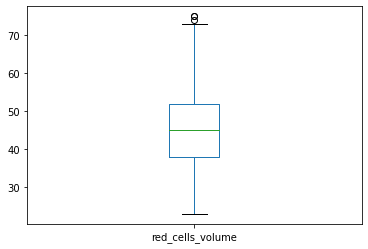

In [60]:
#переменная red_cells_volume - есть выбросы в верхних значениях
horse_data_small['red_cells_volume'].plot(kind='box')

In [135]:
q1 = horse_data_small['red_cells_volume'].quantile(0.25)
q3 = horse_data_small['red_cells_volume'].quantile(0.75)
iqr=q3 - q1
lower_= q1 - 1.5*iqr
upper_= q3 + 1.5*iqr
print ('q1=', q1)
print ('q3=', q3)
print ('lower bound=', lower_)
print ('upper bound=', upper_)

q1= 38.0
q3= 52.0
lower bound= 17.0
upper bound= 73.0


In [136]:
#3 значения выше upper bound=73
horse_data_small.groupby('red_cells_volume').size()

red_cells_volume
23.0     1
24.0     1
26.0     1
28.0     1
30.0     1
31.0     2
31.5     1
32.0     2
33.0     8
34.0     5
35.0    10
36.0    11
37.0    16
37.5     1
38.0     9
39.0     9
40.0    12
41.0     8
42.0     8
43.0    14
44.0    13
45.0    14
46.0     9
47.0    10
48.0     9
49.0     7
50.0    16
51.0     2
52.0     6
53.0     4
54.0     6
55.0     6
56.0     2
57.0     6
58.0     2
59.0     2
60.0     8
63.0     2
64.0     4
65.0     4
66.0     3
67.0     1
68.0     4
69.0     2
70.0     1
71.0     1
72.0     1
73.0     2
74.0     1
75.0     2
dtype: int64

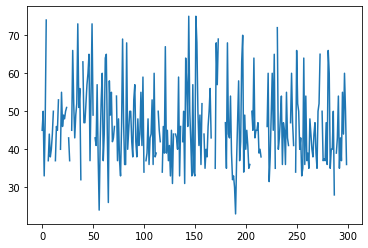

In [80]:
horse_data_small['red_cells_volume'].plot()

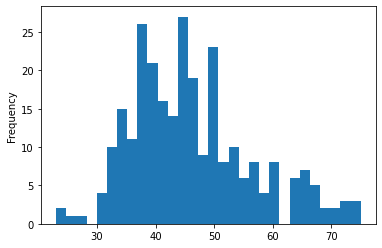

In [81]:
#Смотрим гистограмму. Проверяем насколько выбросы отделены от остального распределения
horse_data_small['red_cells_volume'].plot(kind='hist', bins=30)

#Вывод: выбросы естественные, не являются ошибками. В данном случае - это специфика распределения с длинным правым хвостом.
#Не заменяем значения

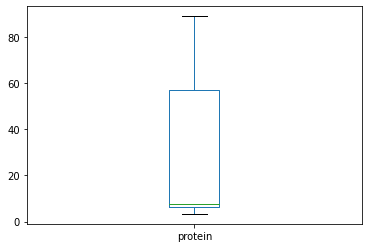

In [61]:
#переменная protein - нет выбросов
#распределение интересное: показывает две разные группы. Как вариант, характеризует больных/не больных
#либо вторая группа измерялась в другой шкале. не в грам/децилитр а в гр/на литр
horse_data_small['protein'].plot(kind='box')

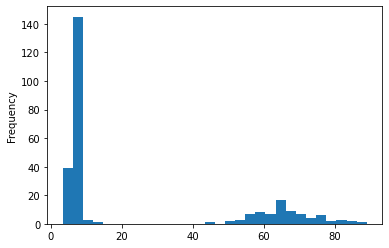

In [88]:
horse_data_small['protein'].plot(kind='hist', bins=30)

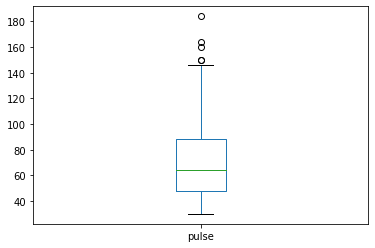

In [129]:
#переменная pulse - есть выбросы в верхних значениях
horse_data_small['pulse'].plot(kind='box')


In [137]:
q1 = horse_data_small['pulse'].quantile(0.25)
q3 = horse_data_small['pulse'].quantile(0.75)
iqr=q3 - q1
lower_= q1 - 1.5*iqr
upper_= q3 + 1.5*iqr
print ('q1=', q1)
print ('q3=', q3)
print ('lower bound=', lower_)
print ('upper bound=', upper_)

q1= 48.0
q3= 88.0
lower bound= -12.0
upper bound= 148.0


In [138]:
#5 значений выше upper bound=148
horse_data_small.groupby('pulse').size()

pulse
30.0      2
36.0      3
38.0      1
40.0     18
42.0     10
44.0     11
45.0      2
46.0      1
48.0     28
49.0      1
50.0      6
52.0     12
54.0      7
56.0      7
60.0     25
64.0      8
65.0      1
66.0      6
68.0      5
70.0      4
72.0     11
75.0      1
76.0      4
78.0      3
80.0      8
82.0      1
84.0      8
86.0      3
88.0     12
90.0      3
92.0      4
96.0      8
98.0      1
100.0    11
104.0     5
108.0     3
110.0     1
112.0     3
114.0     2
120.0    10
124.0     2
128.0     1
129.0     1
130.0     2
132.0     1
136.0     1
140.0     2
146.0     1
150.0     2
160.0     1
164.0     1
184.0     1
dtype: int64

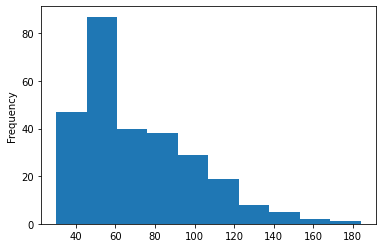

In [90]:
#Смотрим гистограмму. Проверяем насколько выбросы отделены от остального распределения
horse_data_small['pulse'].plot(kind='hist', bins=10)

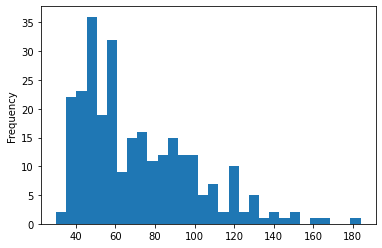

In [91]:
horse_data_small['pulse'].plot(kind='hist', bins=30)

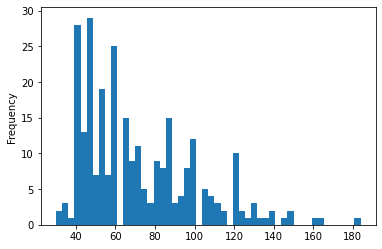

In [92]:
horse_data_small['pulse'].plot(kind='hist', bins=50)

In [133]:
"""
по найденным данным смотрим возможные границы пульса лошадей. Пульс выше 100 может быть только у новорожденных, 
пульс выше 130 отсутствует. данный пульс может говорить о каком-то специфическом состоянии лошади

Частота пульса у лошадей
Новорожденные жеребята –(число ударов)100-130
Жеребята в возрасте – 2 нед 80-120
Жеребята в возрасте – 3–5 мес 64-76
Жеребята в возрасте – 6-12 мес 48-72
Жеребята в возрасте – 1–2 лет 40-56
Жеребцы – 28-32
Взрослый конь (мерин) – 33-39
Кобыла – 34-40
"""
0

0

In [106]:
remove_outliers = horse_data_small[horse_data_small['pulse'].between(lower_,upper_, inclusive=True)].sort_values('pulse')
remove_outliers

,reflux_ph,red_cells_volume,protein,pulse,distension_ctg,abd_fluid_ctg,outcome,age_flg
130,NaN,NaN,NaN,30.0,NaN,NaN,2.0,1
232,NaN,40.0,7.7,30.0,NaN,NaN,1.0,1
203,NaN,35.0,5.7,36.0,1.0,NaN,1.0,1
276,2.0,37.0,75.0,36.0,2.0,2.0,3.0,1
242,4.0,41.0,5.9,36.0,3.0,NaN,2.0,1
...,...,...,...,...,...,...,...,...
148,6.2,57.0,8.0,132.0,2.0,NaN,1.0,1
135,4.4,33.0,4.9,136.0,3.0,2.0,2.0,9
44,NaN,57.0,69.0,140.0,NaN,3.0,3.0,1
103,NaN,39.0,5.3,140.0,2.0,NaN,1.0,9


In [134]:
#помимо 5 выбросов убрали также и все пустые значения. 

#Видим, что все лошади с пульсом высше upper_bound умерли (outcome=2). Далее проверим гипотезу о том,
#что такой пульс - показатель болезни
pd.concat([horse_data_small,remove_outliers]).drop_duplicates(keep=False)

,reflux_ph,red_cells_volume,protein,pulse,distension_ctg,abd_fluid_ctg,outcome,age_flg
3,5.0,48.0,7.2,164.0,4.0,3.0,2.0,9
5,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1
28,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
41,NaN,47.0,8.5,150.0,NaN,NaN,1.0,9
52,NaN,43.0,7.7,NaN,1.0,NaN,1.0,1
55,NaN,38.0,NaN,160.0,4.0,2.0,2.0,9
56,NaN,24.0,6.7,NaN,NaN,NaN,1.0,1
58,NaN,53.0,5.9,NaN,3.0,3.0,2.0,1
74,NaN,37.0,4.9,NaN,NaN,NaN,2.0,9
93,NaN,38.0,6.5,NaN,3.0,NaN,2.0,1


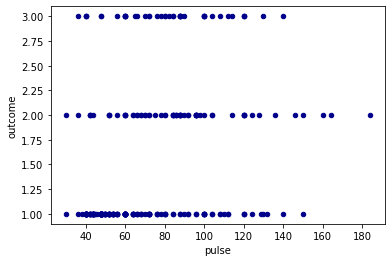

In [139]:
horse_data_small.plot.scatter(x='pulse',
                      y='outcome',
                      c='DarkBlue')

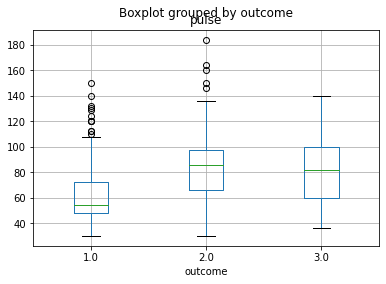

In [28]:
#Смотрим показатели выживших лошадей. Видим, что медиана пульса у них сильно ниже чем у умерших. 
#За исключением одного случая, среди выживших нет пульса выше 140. Таким образом косвенно пульс выше 140
#скорее всего смертелен. 

#Вывод: все-таки считаем их естественными выбросами - характеристиками плохого состояния
horse_data_small.boxplot(column='pulse', by = 'outcome')

In [27]:
"""
Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе 
работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.
"""
horse_data_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reflux_ph         53 non-null     float64
 1   red_cells_volume  271 non-null    float64
 2   protein           267 non-null    float64
 3   pulse             276 non-null    float64
 4   distension_ctg    244 non-null    float64
 5   abd_fluid_ctg     135 non-null    float64
 6   outcome           299 non-null    float64
 7   age_flg           300 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [29]:
for col in horse_data_small.columns:
    df_miss = horse_data_small[col].isna().mean()
    print(f'{col}-{df_miss:.1%}')
    
#reflux_ph-82.3%  Много пропусков . Этот столбец далее будем удалять

reflux_ph-82.3%
red_cells_volume-9.7%
protein-11.0%
pulse-8.0%
distension_ctg-18.7%
abd_fluid_ctg-55.0%
outcome-0.3%
age_flg-0.0%


In [15]:
#если удалим все пропуски, останется 29 записей
horse_data_small.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 3 to 291
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reflux_ph         29 non-null     float64
 1   red_cells_volume  29 non-null     float64
 2   protein           29 non-null     float64
 3   pulse             29 non-null     float64
 4   distension_ctg    29 non-null     float64
 5   abd_fluid_ctg     29 non-null     float64
 6   outcome           29 non-null     float64
 7   age_flg           29 non-null     int64  
dtypes: float64(7), int64(1)
memory usage: 2.0 KB


In [14]:
#удаляем строки, в ктороых заполнено не менее n столбцов из 8ми
n=5
horse_data_small.dropna(thresh=n).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reflux_ph         53 non-null     float64
 1   red_cells_volume  267 non-null    float64
 2   protein           264 non-null    float64
 3   pulse             258 non-null    float64
 4   distension_ctg    234 non-null    float64
 5   abd_fluid_ctg     134 non-null    float64
 6   outcome           272 non-null    float64
 7   age_flg           273 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 19.2 KB


In [89]:
horse_data_small_dr1= horse_data_small.drop(['reflux_ph'], axis=1)
horse_data_small_dr1.info()
#Много пропусков >80%. столбец reflux_ph удаляем. Пишем в новый датасет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   red_cells_volume  271 non-null    float64
 1   protein           267 non-null    float64
 2   pulse             276 non-null    float64
 3   distension_ctg    244 non-null    float64
 4   abd_fluid_ctg     135 non-null    float64
 5   outcome           299 non-null    float64
 6   age_flg           300 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 16.5 KB


In [90]:
#заполение пропусков в переменной red_cells_volume
#есть различия в разных статусах лошади
print('кол-во пустых=',horse_data_small_dr1['red_cells_volume'].isna().sum())
#смотрим среднее и медину в разрезе статуса лошади жива/не жива
print('медиана=', horse_data_small_dr1['red_cells_volume'].median())
print('среднее=', horse_data_small_dr1['red_cells_volume'].mean())
print('среднее по полю outcome', horse_data_small_dr1.groupby('outcome')['red_cells_volume'].mean())
print('медиана по полю outcome', horse_data_small_dr1.groupby('outcome')['red_cells_volume'].median())

кол-во пустых= 29
медиана= 45.0
среднее= 46.29520295202952
среднее по полю outcome outcome
1.0    42.727273
2.0    52.536232
3.0    50.777778
Name: red_cells_volume, dtype: float64
медиана по полю outcome outcome
1.0    42.0
2.0    53.0
3.0    50.5
Name: red_cells_volume, dtype: float64


In [91]:
#заполняем медианой группируя по статусу лошади
horse_data_small_dr2 = horse_data_small_dr1
horse_data_small_dr2['red_cells_volume'].fillna(horse_data_small_dr2.groupby('outcome')['red_cells_volume'].transform('median'),inplace=True)

In [92]:
#после заполнения
print('кол-во пустых=',horse_data_small_dr2['red_cells_volume'].isna().sum())

print('медиана=', horse_data_small_dr2['red_cells_volume'].median())
print('среднее=', horse_data_small_dr2['red_cells_volume'].mean())
print('среднее по полю outcome', horse_data_small_dr2.groupby('outcome')['red_cells_volume'].mean())
print('медиана по полю outcome', horse_data_small_dr2.groupby('outcome')['red_cells_volume'].median())

кол-во пустых= 0
медиана= 45.0
среднее= 46.4
среднее по полю outcome outcome
1.0    42.674157
2.0    52.584416
3.0    50.727273
Name: red_cells_volume, dtype: float64
медиана по полю outcome outcome
1.0    42.0
2.0    53.0
3.0    50.5
Name: red_cells_volume, dtype: float64


In [93]:
#заполение пропусков в переменной protein
#есть различия в разных статусах лошад
print('кол-во пустых=',horse_data_small_dr1['protein'].isna().sum())
#смотрим среднее и медину в разрезе статуса лошади жива/не жива
print('медиана=', horse_data_small_dr1['protein'].median())
print('среднее=', horse_data_small_dr1['protein'].mean())
print('среднее по полю outcome', horse_data_small_dr1.groupby('outcome')['protein'].mean())
print('медиана по полю outcome', horse_data_small_dr1.groupby('outcome')['protein'].median())


кол-во пустых= 33
медиана= 7.5
среднее= 24.456928838951317
среднее по полю outcome outcome
1.0    27.264848
2.0     6.844615
3.0    42.038889
Name: protein, dtype: float64
медиана по полю outcome outcome
1.0     7.5
2.0     6.8
3.0    56.0
Name: protein, dtype: float64


In [94]:
#заполняем медианой группируя по статусу лошади
horse_data_small_dr3 = horse_data_small_dr2
horse_data_small_dr3['protein'].fillna(horse_data_small_dr2.groupby('outcome')['protein'].transform('median'),inplace=True)

In [95]:
#после заполнения
print('кол-во пустых=',horse_data_small_dr3['protein'].isna().sum())
print('медиана=', horse_data_small_dr3['protein'].median())
print('среднее=', horse_data_small_dr3['protein'].mean())
print('среднее по полю outcome', horse_data_small_dr3.groupby('outcome')['protein'].mean())
print('медиана по полю outcome', horse_data_small_dr3.groupby('outcome')['protein'].median())

кол-во пустых= 0
медиана= 7.5
среднее= 23.857000000000014
среднее по полю outcome outcome
1.0    25.821348
2.0     6.837662
3.0    44.577273
Name: protein, dtype: float64
медиана по полю outcome outcome
1.0     7.5
2.0     6.8
3.0    56.0
Name: protein, dtype: float64


In [96]:
#заполение пропусков в переменной pulse
#есть различия в разных статусах лошад
print('кол-во пустых=',horse_data_small_dr1['pulse'].isna().sum())
#смотрим среднее и медину в разрезе статуса лошади жива/не жива
print('медиана=', horse_data_small_dr1['pulse'].median())
print('среднее=', horse_data_small_dr1['pulse'].mean())
print('среднее по полю outcome', horse_data_small_dr1.groupby('outcome')['pulse'].mean())
print('медиана по полю outcome', horse_data_small_dr1.groupby('outcome')['pulse'].median())


кол-во пустых= 24
медиана= 64.0
среднее= 71.91304347826087
среднее по полю outcome outcome
1.0    63.421687
2.0    87.227273
3.0    81.744186
Name: pulse, dtype: float64
медиана по полю outcome outcome
1.0    54.0
2.0    86.0
3.0    82.0
Name: pulse, dtype: float64


In [97]:
#заполняем медианой группируя по статусу лошади
horse_data_small_dr4 = horse_data_small_dr3
horse_data_small_dr4['pulse'].fillna(horse_data_small_dr3.groupby('outcome')['pulse'].transform('median'),inplace=True)

In [98]:
#после заполнения
print('кол-во пустых=',horse_data_small_dr4['pulse'].isna().sum())
print('медиана=', horse_data_small_dr4['pulse'].median())
print('среднее=', horse_data_small_dr4['pulse'].mean())
print('среднее по полю outcome', horse_data_small_dr4.groupby('outcome')['pulse'].mean())
print('медиана по полю outcome', horse_data_small_dr4.groupby('outcome')['pulse'].median())

кол-во пустых= 0
медиана= 64.0
среднее= 71.74666666666667
среднее по полю outcome outcome
1.0    62.786517
2.0    87.051948
3.0    81.750000
Name: pulse, dtype: float64
медиана по полю outcome outcome
1.0    54.0
2.0    86.0
3.0    82.0
Name: pulse, dtype: float64


In [103]:
#заполение пропусков в переменной outcome
#Один пропуск - заполним модой. Самое частое значение =1. 
print('кол-во пустых=',horse_data_small_dr1['outcome'].isna().sum())

print(horse_data_small_dr1.groupby('outcome').count()['red_cells_volume'])

кол-во пустых= 1
outcome
1.0    178
2.0     77
3.0     44
Name: red_cells_volume, dtype: int64


In [104]:
orse_data_small_dr5=horse_data_small_dr4
horse_data_small_dr5['outcome'].fillna(1.0, inplace=True)

In [101]:
#после заполнения
print('кол-во пустых=',horse_data_small_dr5['outcome'].isna().sum())

кол-во пустых= 0


In [262]:
#заполение пропусков в переменной distension_ctg
print('кол-во пустых=',horse_data_small_dr1['distension_ctg'].isna().sum())

print(horse_data_small_dr1.groupby('distension_ctg').count()['red_cells_volume'])

кол-во пустых= 56
distension_ctg
1.0    76
2.0    65
3.0    65
4.0    38
Name: red_cells_volume, dtype: int64


In [242]:
#создаём список с границами вероятностей всех значений поля distension_ctg :  list_bnd
list_val = horse_data_small_dr1[horse_data_small_dr1.distension_ctg.isna()==0]['distension_ctg'].unique()
len_list= len(list_val)

df_size_notnull = len(horse_data_small_dr1[horse_data_small_dr1.distension_ctg.isna()==0])

list_prob = {}
list_bnd = {}

t_prob_prev=0
j=1

for i in list_val:
    t_prob = round(horse_data_small_dr1[horse_data_small_dr1.distension_ctg==i].count()['distension_ctg']/df_size_notnull,2)
    if t_prob>0:    
        list_prob[i]=t_prob
        t_prob_ = round(t_prob_prev+t_prob,2)
        if j== len_list: t_prob_ =1 
        list_bnd[i]=[t_prob_prev,t_prob_]
        t_prob_prev = t_prob_
    j+=1
    
print(list_prob)
print(list_bnd)
    

{4.0: 0.16, 2.0: 0.27, 1.0: 0.31, 3.0: 0.27}
{4.0: [0, 0.16], 2.0: [0.16, 0.43], 1.0: [0.43, 0.74], 3.0: [0.74, 1]}


In [205]:
import numpy as np
import numpy.random
import math

In [243]:
#создаём функцию, которая возвращает переменную, заполненную значениями distension_ctg с тем же распределением
def define_notnull(param):
    #print('param=', param)
    if (param is None)  or (math.isnan(param)):
        rnd = numpy.random.uniform()
        for key, value in list_bnd.items():
     #       print('value[0]=', value[0], 'value[1]=', value[1], 'rnd=', rnd)
            if rnd>=value[0] and rnd<value[1] : 
                res=key 
      #          print(res)
            
        return res
    return param

my_none_variable = None
define_notnull(my_none_variable)

3.0

In [225]:
horse_data_small_dr6=horse_data_small_dr5

In [244]:
horse_data_small_dr6['distension_ctg_notnull']=horse_data_small_dr6['distension_ctg'].apply(define_notnull)

In [245]:
horse_data_small_dr6

,red_cells_volume,protein,pulse,distension_ctg,abd_fluid_ctg,outcome,age_flg,distension_ctg_notnull
0,45.0,8.4,66.0,4.0,NaN,2.0,1,4.0
1,50.0,85.0,88.0,2.0,2.0,3.0,1,2.0
2,33.0,6.7,40.0,1.0,NaN,1.0,1,1.0
3,48.0,7.2,164.0,4.0,3.0,2.0,9,4.0
4,74.0,7.4,104.0,NaN,NaN,2.0,1,1.0
...,...,...,...,...,...,...,...,...
295,55.0,65.0,120.0,NaN,NaN,3.0,1,3.0
296,44.0,56.0,72.0,3.0,3.0,3.0,1,3.0
297,60.0,6.8,72.0,3.0,NaN,2.0,1,3.0
298,50.0,6.0,100.0,3.0,3.0,1.0,1,3.0


In [246]:
#после заполнения
print('кол-во пустых=',hrse_data_small_dr6['distension_ctg_notnull'].isna().sum())

кол-во пустых= 0


In [263]:
#заполение пропусков в переменной abd_fluid_ctg
#Один пропуск - заполним модой. Самое частое значение =1. 
print('кол-во пустых=',horse_data_small_dr1['abd_fluid_ctg'].isna().sum())

print(horse_data_small_dr1.groupby('abd_fluid_ctg').count()['red_cells_volume'])

кол-во пустых= 165
abd_fluid_ctg
1.0    41
2.0    48
3.0    46
Name: red_cells_volume, dtype: int64


In [248]:
#создаём список с границами вероятностей всех значений поля distension_ctg :  list_bnd
list_val = horse_data_small_dr1[horse_data_small_dr1.abd_fluid_ctg.isna()==0]['abd_fluid_ctg'].unique()
len_list= len(list_val)

df_size_notnull = len(horse_data_small_dr1[horse_data_small_dr1.abd_fluid_ctg.isna()==0])

list_prob = {}
list_bnd = {}

t_prob_prev=0
j=1

for i in list_val:
    t_prob = round(horse_data_small_dr1[horse_data_small_dr1.abd_fluid_ctg==i].count()['abd_fluid_ctg']/df_size_notnull,2)
    if t_prob>0:    
        list_prob[i]=t_prob
        t_prob_ = round(t_prob_prev+t_prob,2)
        if j== len_list: t_prob_ =1 
        list_bnd[i]=[t_prob_prev,t_prob_]
        t_prob_prev = t_prob_
    j+=1
    
print(list_prob)
print(list_bnd)

{2.0: 0.36, 3.0: 0.34, 1.0: 0.3}
{2.0: [0, 0.36], 3.0: [0.36, 0.7], 1.0: [0.7, 1]}


In [249]:
horse_data_small_dr7=horse_data_small_dr6

In [250]:
horse_data_small_dr7['abd_fluid_ctg_notnull']=horse_data_small_dr7['abd_fluid_ctg'].apply(define_notnull)

In [251]:
horse_data_small_dr7

,red_cells_volume,protein,pulse,distension_ctg,abd_fluid_ctg,outcome,age_flg,distension_ctg_notnull,abd_fluid_ctg_notnull
0,45.0,8.4,66.0,4.0,NaN,2.0,1,4.0,3.0
1,50.0,85.0,88.0,2.0,2.0,3.0,1,2.0,2.0
2,33.0,6.7,40.0,1.0,NaN,1.0,1,1.0,2.0
3,48.0,7.2,164.0,4.0,3.0,2.0,9,4.0,3.0
4,74.0,7.4,104.0,NaN,NaN,2.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...
295,55.0,65.0,120.0,NaN,NaN,3.0,1,3.0,1.0
296,44.0,56.0,72.0,3.0,3.0,3.0,1,3.0,3.0
297,60.0,6.8,72.0,3.0,NaN,2.0,1,3.0,3.0
298,50.0,6.0,100.0,3.0,3.0,1.0,1,3.0,3.0


In [264]:
#после заполнения
print('кол-во пустых=',horse_data_small_dr7['abd_fluid_ctg_notnull'].isna().sum())

кол-во пустых= 0


In [265]:
for col in horse_data_small_dr7.columns:
    df_miss = horse_data_small_dr7[col].isna().mean()
    print(f'{col}-{df_miss:.1%}')
    

red_cells_volume-0.0%
protein-0.0%
pulse-0.0%
distension_ctg-18.7%
abd_fluid_ctg-55.0%
outcome-0.0%
age_flg-0.0%
distension_ctg_notnull-0.0%
abd_fluid_ctg_notnull-0.0%
